**Class: Positive/Negative**


In [165]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, confusion_matrix, recall_score, roc_auc_score
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import Image
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn import model_selection
from sklearn import metrics
import joblib

In [166]:
df = pd.read_csv('diabetes_data_upload.csv')

**Visualization**

In [167]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.isna().sum() # Checking Missing Values

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

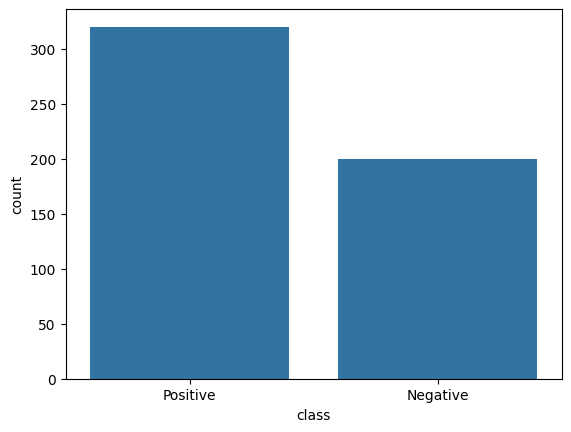

In [ ]:
sns.countplot(x='class', data=df)
plt.show()

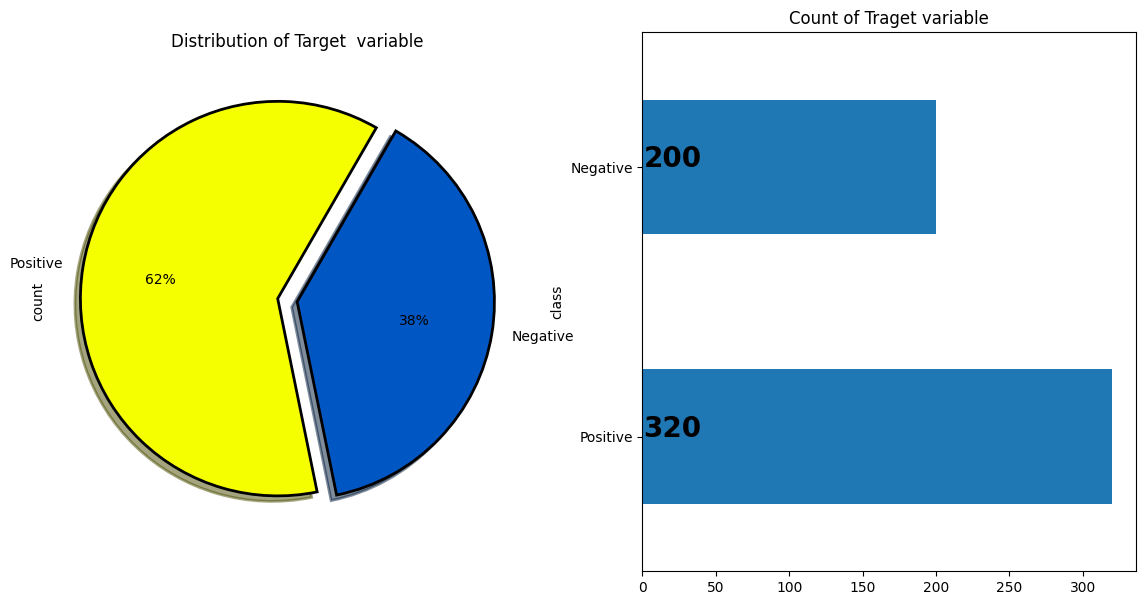

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")
plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")
for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)
plt.title("Count of Traget variable")
plt.show()

In [ ]:
# Gender
plot_criteria=['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns')*100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


In [ ]:
# Polydipsia
plot_criteria=['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns')*100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


In [ ]:
# Polyuria
plot_criteria=['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns')*100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


**Data pre-processing**

In [ ]:
df['class'] = df ['class'].apply(lambda x:0 if x=='Negative' else 1) # Converts the 'class' column of the DataFrame df to numeric values, where 'Negative' is represented as 0 and any other value as 1.

In [ ]:
X =df.drop(['class'], axis=1)
y = df['class']

In [ ]:
objList = X.select_dtypes(include = "object").columns
print(objList)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
# Convert categorical data into numbers
le = LabelEncoder()

for feat in objList:
  X[feat] = le.fit_transform(X[feat].astype(str))

print(X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

<Axes: title={'center': 'Correlation with Diabetess'}>

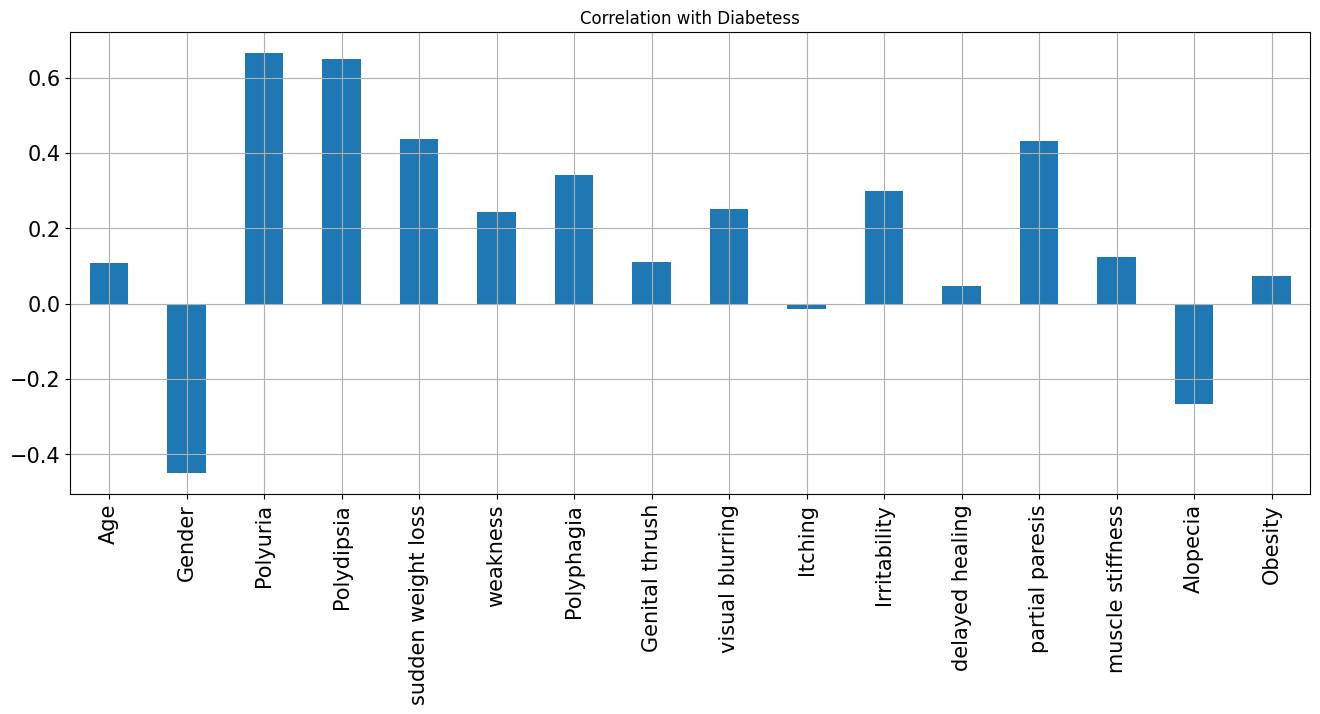

In [ ]:
X.corrwith(y).plot.bar(
    figsize = (16,6), title = "Correlation with Diabetess", fontsize = 15,
    rot = 90, grid = True)

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=1234)
# The stratify parameter in the train_test_split() function is used to ensure that the division of
# the data maintains the same proportion of classes between the training and test sets.

In [ ]:
print("Distribution of target variable in training set")
print(y_train.value_counts())

print("Distribution of target variable in test set")
print(y_test.value_counts())

Distribution of target variable in training set
class
1    256
0    160
Name: count, dtype: int64
Distribution of target variable in test set
class
1    64
0    40
Name: count, dtype: int64


**Data Normalization**

In [ ]:
# Min-Max Scaling transforms the values in the 'Age' column to a range between 0 and 1
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.fit_transform(X_test[['Age']])

In [ ]:
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


**Model Building**

**1. Logist Regression**

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
X_train.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
# Cross-validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_logi.mean()

0.9181184668989548

In [ ]:
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.96875,0.976378,0.971875


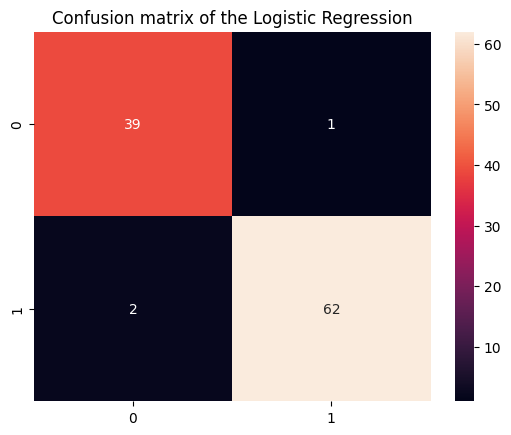

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic Regression')
sns.heatmap(cm_logi, annot=True, fmt='d')
plt.show()

In [ ]:
TP = cm_logi[1,1] # true positives
TN = cm_logi[0,0] # true negatives
FP = cm_logi[0,1] # false positives
FN = cm_logi[1,0] # false negatives
TN / float(TN+FP)

0.975

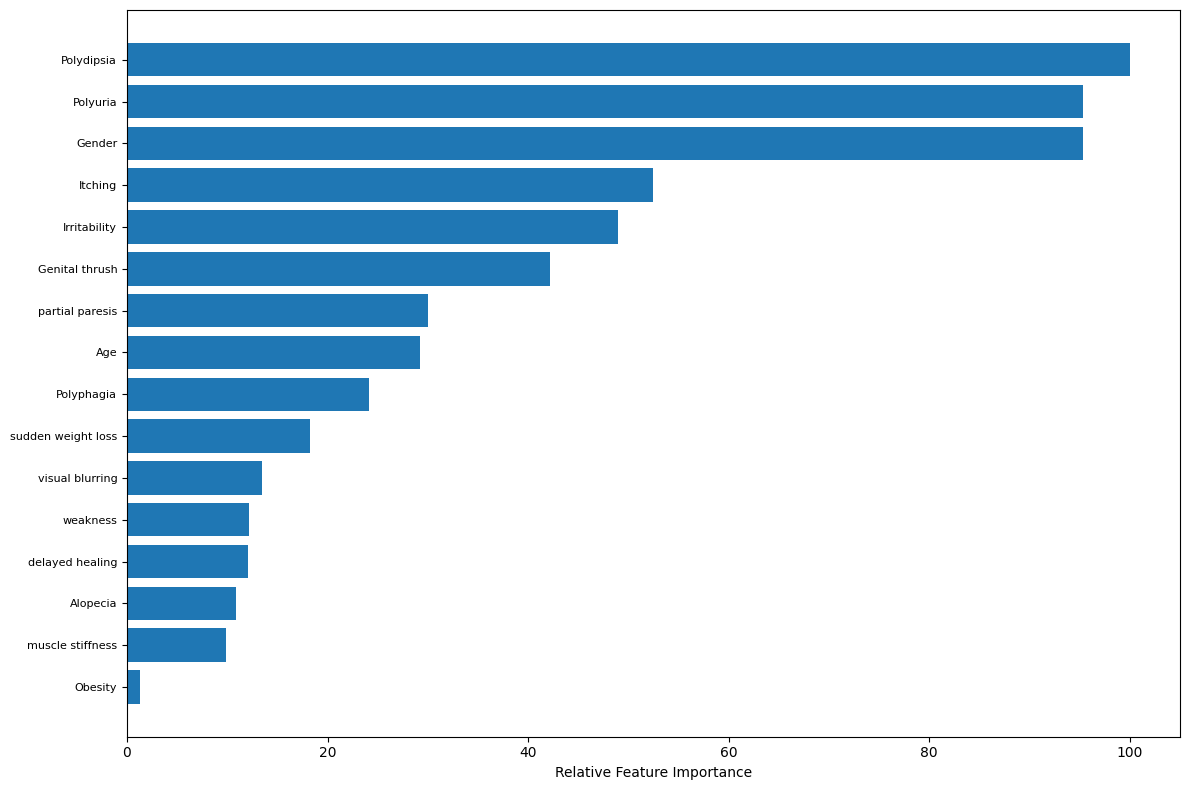

In [ ]:
# Visualise the importance of features in a logistic regression model
feature_importance = abs(logi.coef_[0])
feature_importance = 100.0*(feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .3

featfig = plt.figure(figsize=(12,8))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()
plt.show()

**Random Forest (before tuning)**

In [ ]:
rf = RandomForestClassifier(criterion='gini', n_estimators=100) # For criterion we have gini and entropy but gini uses log and is more faster
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Cross validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv=kfold, scoring = scoring)
acc_rf.mean()

0.9782229965156795

In [ ]:
y_predict_r = rf.predict(X_test)
acc = accuracy_score(y_test, y_predict_r)
roc = roc_auc_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest(Untuned)',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.96875,0.976378,0.971875
1,Random Forest(Untuned),0.980769,0.978223,1.000000,0.96875,0.984127,0.984375


<Axes: title={'center': 'Confusion matrix of the Random Forest classifier'}>

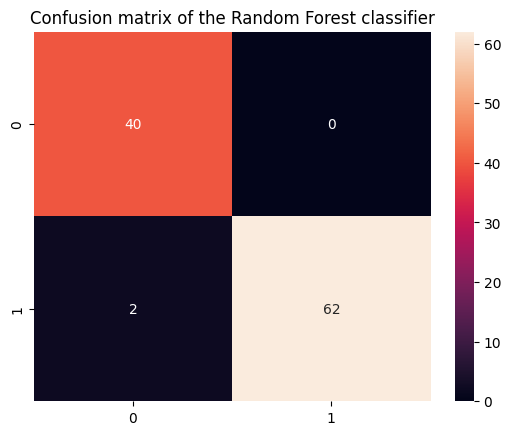

In [ ]:
cm_rf = confusion_matrix(y_test,y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf, annot=True, fmt='d')

In [ ]:
TP = cm_rf[1,1] # true positives
TN = cm_rf[0,0] # true negatives
FP = cm_rf[0,1] # false positives
FN = cm_rf[1,0] # false negatives
TN / float(TN+FP)

1.0

<Axes: >

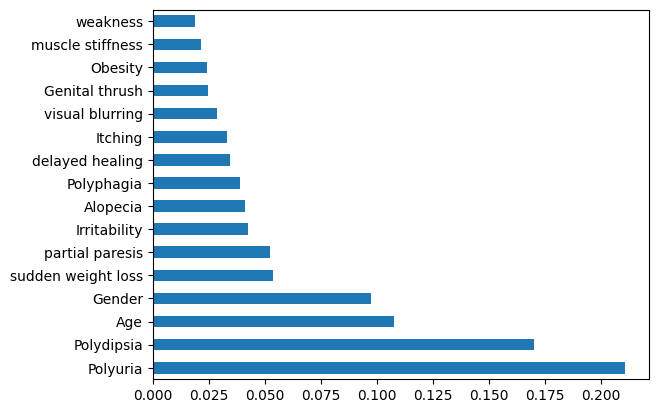

In [ ]:
feat_importances = pd.Series(rf.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')

**Feature Selection - Top 10 Features**

In [ ]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
# filtering unwanted features
X_fs = X[['Polyuria', 'Polydipsia', 'Age','Gender', 'partial paresis', 'sudden weight loss', 'Irritability', 'delayed healing', 'Alopecia', 'Itching']]

**Train Test Split**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2, stratify=y, random_state=1234)
# The stratify parameter in the train_test_split() function is used to ensure that the division of
# the data maintains the same proportion of classes between the training and test sets.

**Data Noramalization**

In [ ]:
# Min-Max Scaling transforms the values in the 'Age' column to a range between 0 and 1
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.fit_transform(X_test[['Age']])

**Logistic regression - Post Feature  Selection**

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [ ]:
joblib.dump(logi, 'logreg.pkl')
joblib.dump(minmax, 'minmax.pkl')

['minmax.pkl']

In [ ]:
model = joblib.load('logreg.pkl')
testset = pd.DataFrame([[0,0,43,0,0,0,1,1,1,1]], columns=['Polyuria', 'Polydipsia', 'Age','Gender', 'partial paresis', 'sudden weight loss', 'Irritability', 'delayed healing', 'Alopecia', 'Itching'], dtype=float)
scaled = minmax.transform(testset[['Age']])

In [ ]:
testset[['Age']] = minmax.transform(testset[['Age']])
prediction = model.predict(testset)[0]
prediction_proba = model.predict_proba(testset)
prediction_probs = round(prediction_proba[0, 1]*100,2)
prediction_probs

77.56

In [ ]:
# Cross-validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_logi.mean()

0.8988385598141695

In [ ]:
y_predict_logi = logi.predict(X_test)
acc = accuracy_score(y_test, y_predict_logi)
roc = roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression-Post FS',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
1,Random Forest(Untuned),0.980769,0.980662,1.000000,0.968750,0.984127,0.984375
2,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063


**Random Forest - Post Feature  Selection**

In [ ]:
rf = RandomForestClassifier(criterion='gini', n_estimators=100) # For criterion we have gini and entropy but gini uses log and is more faster
rf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Cross-validation
kfold = model_selection.KFold(n_splits=10)
scoring = 'accuracy'

acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold, scoring=scoring)
acc_logi.mean()

0.8988385598141695

In [ ]:
y_predict_r = rf.predict(X_test)
acc = accuracy_score(y_test, y_predict_r)
roc = roc_auc_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest - Post FS',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = pd.concat([results, model_results], ignore_index=True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
1,Random Forest(Untuned),0.980769,0.980662,1.000000,0.968750,0.984127,0.984375
2,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
3,Random Forest - Post FS,0.971154,0.980662,1.000000,0.953125,0.976000,0.976562


**ROC**

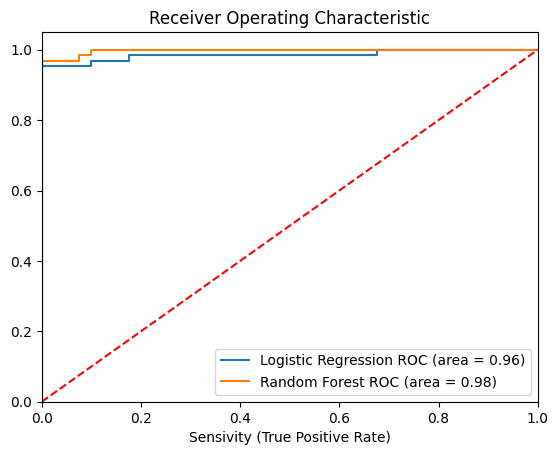

In [ ]:
plt.figure()

models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state=0, penalty='l2'),
},

{
    'label':'Random Forest',
    'model': RandomForestClassifier( criterion='gini', n_estimators = 100),
},
]

for m in models:
  model = m['model']
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)

  fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])

  auc = metrics.roc_auc_score(y_test, model.predict(X_test))

  plt.plot(fpr, tpr, label ='%s ROC (area = %0.2f)' % (m['label'], auc))

plt.plot([0,1], [0,1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1 - Specificity (False Positive Rate)')
plt.xlabel('Sensivity (True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()